In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
import copy
from tqdm import tqdm
import pickle
from datetime import datetime

In [2]:
!git clone https://github.com/Samuele-Caccavelli/bayesian_statistics_project.git
%cd bayesian_statistics_project

Cloning into 'bayesian_statistics_project'...
remote: Enumerating objects: 169, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 169 (delta 79), reused 128 (delta 46), pack-reused 0 (from 0)
Receiving objects: 100% (169/169), 9.14 MiB | 5.04 MiB/s, done.
Resolving deltas: 100% (79/79), done.
/content/bayesian_statistics_project


In [3]:
import sys, os
sys.path.insert(0, os.path.dirname(os.path.abspath('../../main_code')))
from main_code.MCMCs import Neal_3, PPMx
from main_code.data_generation import generate_gaussian_mixture
from main_code.visualization import plot_clusters
from main_code.partitions_analysis import find_optimal_clustering

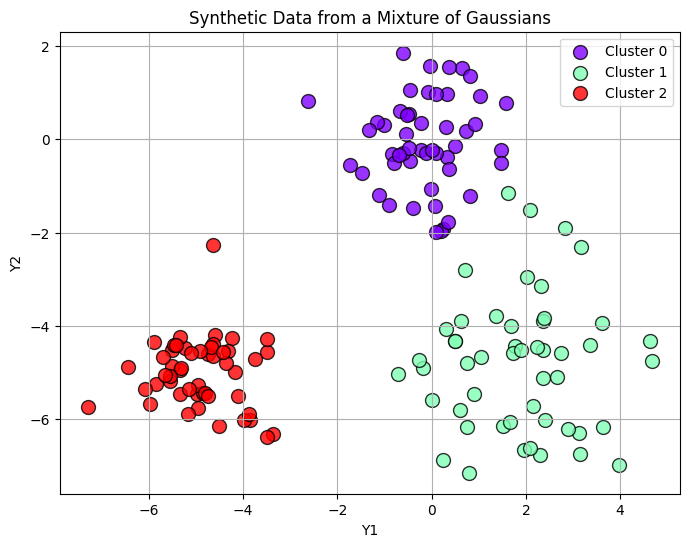

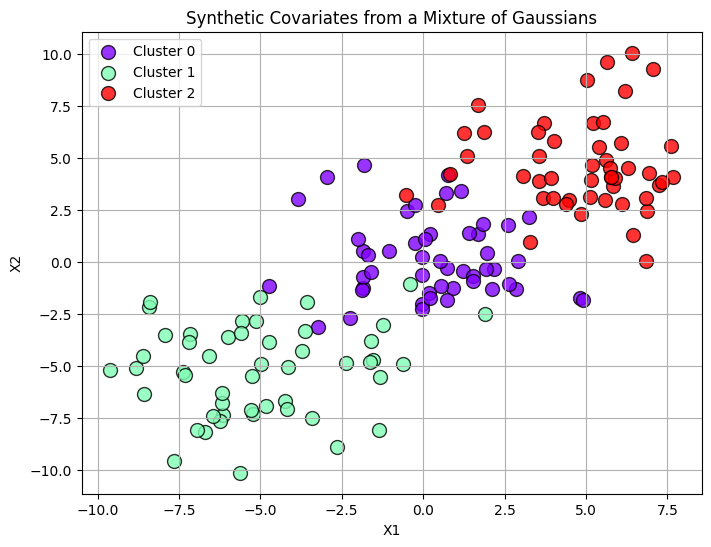

In [4]:
# Sample syntethic
np.random.seed(42)  # for reproducibility
random.seed(42)

# Y
means = [[0, 0], [2, -5], [-5, -5]]
covariances = [np.eye(2), 2 * np.eye(2), 0.5 * np.eye(2)]
n_samples = [50, 50, 50]

Y, labels = generate_gaussian_mixture(means, covariances, n_samples)

plot_clusters(Y, labels, "Synthetic Data from a Mixture of Gaussians", xlabel="Y1", ylabel="Y2")


# X
means_X = [[0, 0], [-5, -5], [5, 5]]
covariances_X = [np.eye(2)*5, np.eye(2)*5, np.eye(2)*5]

X, _ = generate_gaussian_mixture(means_X, covariances_X, n_samples)

plot_clusters(X, labels, "Synthetic Covariates from a Mixture of Gaussians")

In [5]:
ppmx = PPMx()

# barra di output non stampata per mptivi di efficenza
sys.stdout = open(os.devnull, 'w')  # Disabilita la stampa
history = ppmx.fit(Y, X, 1000, metrics=["entropy"])
sys.stdout = sys.__stdout__  # Riattiva la stampa

MCMC Progress: 100%|██████████| 1000/1000 [07:13<00:00,  2.31step/s]


Similarity Matrix Progress: 100%|██████████| 1001/1001 [00:02<00:00, 425.60step/s]


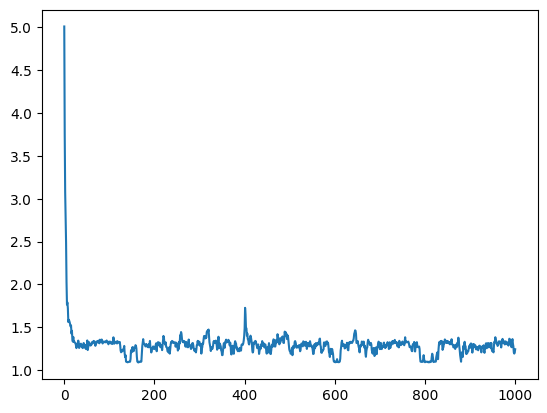

In [6]:
# Trying our clustering algorithm with covariates

ppmx.compute_similarity_matrix()
plt.figure()
plt.plot(ppmx.metrics["entropy"])
plt.show()

In [7]:
# --- attenzione! ---
# burnin deve essere < n_iterazioni
burnin = 200
optimal_clustering, optimal_loss = find_optimal_clustering(ppmx.history[burnin:], ppmx.similatity_matrix,
                                                           loss="binder", alpha=1.0, beta=1.0)

Point Estimate Progress: 100%|██████████| 801/801 [00:30<00:00, 26.53step/s]


In [14]:
sys.stdout = sys.__stdout__  # Riattiva la stampa

In [18]:
optimal_loss

959.6583416582861

<Figure size 640x480 with 0 Axes>

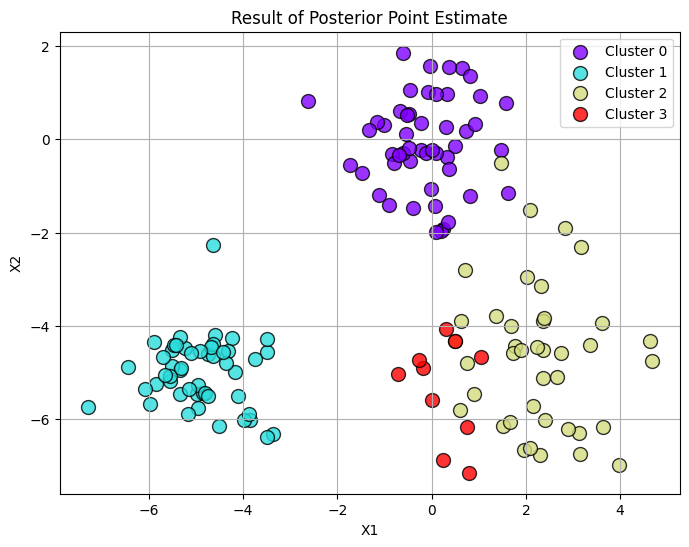

In [16]:
plt.figure()
plot_clusters(Y, optimal_clustering, "Result of Posterior Point Estimate")